# FINAL PROJECT 4 : CLUSTERING CREDIT CARD COSTUMER 

## Introduction

### Our Members:

a. Nama: Minan Abdillah ID: PYTN-KS16-010

b. Michael Vincent Efren Malomo ID: PYTN-KS16-016

c. Muhammad Danu Prasetia ID: PYTN-KS16-020

### Abstract

<p style='text-align: justify;'>
    Meskipun kartu kredit telah ada dalam waktu yang lama, perkembangan model transaksi keuangan saat ini telah meningkatkan tingkat kemanfaatan dan kenyamanan penggunaan kartu kredit. Kartu kredit pada dasarnya adalah alat pembayaran dalam bentuk kartu, di mana biaya transaksi keuangan dibayarkan terlebih dahulu oleh penerbit kartu. Kemudian, pemegang kartu wajib melunasi pembayaran tepat waktu sesuai kesepakatan sebelumnya. Kartu kredit memiliki perbedaan dengan kartu debit konvensional, karena kartu kredit menawarkan keuntungan unik, walaupun pada banyak aspek, keduanya tidak jauh berbeda, hanya pada sumber dana yang digunakan, yakni saldo terutang yang dibatasi hingga jumlah tertentu.</p>

<p style='text-align: justify;'>
Pemegang kartu kredit akan dikenakan berbagai biaya terkait penggunaan kartu, termasuk biaya tahunan yang disesuaikan dengan fasilitas bank. Pada umumnya, biaya tahunan pada tahun pertama sering diabaikan untuk memberikan keuntungan tambahan bagi pengguna kartu kredit. Selain itu, terdapat biaya keterlambatan dan bunga. Biaya keterlambatan timbul jika pembayaran tagihan terlambat, dan selama periode ini, bunga akan diterapkan jika kartu digunakan untuk pembayaran kredit atau cicilan. Pemegang kartu yang melampaui batas kredit juga akan dikenai biaya.</p>
    
<p style='text-align: justify;'>
Selain berbagai biaya tersebut, kartu kredit juga mengenakan biaya tambahan untuk layanan tertentu, seperti biaya penarikan tunai dan informasi pembayaran. Biaya penarikan tunai muncul ketika kartu kredit digunakan untuk menarik dana, sementara biaya informasi pembayaran dikenakan jika nasabah memerlukan detail dan kelengkapan informasi pembayaran. Jika memungkinkan, disarankan untuk memilih kartu kredit tanpa biaya bulanan untuk mengurangi beban biaya.</p>


### Data

<p style='text-align: justify;'>
    Dataset yang digunakan yaitu <b>Credit Card Data</b> yang berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut, antara lain: </p>

1. CUSTID - ID Pemegang Kartu Kredit (Categorical)
2. BALANCE - Saldo yang harus tertahan di rekening pemegang kartu (
3. BALANCEFREQUENCY - Seberapa sering Saldo diperbarui, skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. PURCHASES - Jumlah pembelian yang dilakukan dari akun
5. ONEOFFPURCHASES - Jumlah pembelian maksimum yang dilakukan sekaligus
6. INSTALLMENTSPURCHASES - Jumlah pembelian yang dilakukan secara cicilan
7. CASHADVANCE - Uang tunai yang diberikan oleh pengguna
8. PURCHASESFREQUENCY - Seberapa sering pembelian dilakukan, skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. ONEOFFPURCHASESFREQUENCY - Seberapa sering pembelian dilakukan sekaligus (1 = sering dibeli, 0 = tidak sering dibeli)
10. PURCHASESINSTALLMENTSFREQUENCY - Seberapa sering pembelian secara cicilan dilakukan (1 = sering dilakukan, 0 = tidak sering dilakukan)
11. CASHADVANCEFREQUENCY - Seberapa sering uang tunai diadvance dibayar
12. CASHADVANCETRX - Jumlah transaksi yang dilakukan dengan "Cash in Advance"
13. PURCHASESTRX - Jumlah transaksi pembelian yang dilakukan
14. CREDITLIMIT - Batas Kartu Kredit untuk pengguna
15. PAYMENTS - Jumlah pembayaran yang dilakukan oleh pengguna
16. MINIMUM_PAYMENTS - Jumlah pembayaran minimum yang dilakukan oleh pengguna
17. PRCFULLPAYMENT - Persentase pembayaran penuh yang dilakukan oleh pengguna
18. TENURE - Jangka waktu layanan kartu kredit untuk pengguna


### Objective
Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from pylab import bone, pcolor, colorbar, plot, show
# K-Means Clusterinng
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
# DBScan Clustering
from sklearn.cluster import DBSCAN
# Agglomerative Clustering
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
# Visualization Hierarchy diagram
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import linkage, dendrogram
#DBSCAN
from sklearn.cluster import DBSCAN

from sklearn.metrics import silhouette_score

## Data Loading

### Import Dataset

In [2]:
#Membaca data

file_path = "Dataset/CC GENERAL.csv"
df = pd.read_csv(file_path)
pd.set_option("display.max_columns", None)

In [3]:
#Menampilkan 5 data teratas pada data
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
#Menampilkan 5 data terbawah pada data
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


### Number of Rows and Columns

In [5]:
# Melihat jumlah baris dan jumlah kolom pada data
print("Jumlah Baris: ",len(df),"\nJumlah Kolom: ",len(df.columns))

Jumlah Baris:  8950 
Jumlah Kolom:  18


### Columns

In [6]:
# Melihat nama kolom pada data
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

### Type of Data

In [7]:
# Melihat Informasi lebih detail mengenai struktur DataFrame dapat dilihat menggunakan fungsi info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

### Memeriksa Missing Values

In [8]:
#Mengecek missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

### Check Duplicated Data

In [9]:
#Mengecek data duplikat
df.duplicated().sum()

0

## Data Cleaning

### Handling Missing Values

In [10]:
#Menangani missing values dengan mean pada Kolom Credit Limit
df.loc[(df['CREDIT_LIMIT'].isnull()==True),'CREDIT_LIMIT']=df['CREDIT_LIMIT'].mean()

#Menangani missing values dengan mean pada Kolom Minimum Payments
df.loc[(df['MINIMUM_PAYMENTS'].isnull()==True),'MINIMUM_PAYMENTS']=df['MINIMUM_PAYMENTS'].mean()

In [11]:
#Memeriksa kembali missing value
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

## Data Exploration

### Describe Data

In [12]:
#Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [13]:
# Melihat korelasi dalam data
df.corr()

C:\Users\MINAN\AppData\Local\Temp\ipykernel_22696\2600187864.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531267,0.322802,0.394282,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095795,0.065008,0.114249,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356959,0.603264,0.093515,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319721,0.567292,0.048597,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256496,0.384084,0.131687,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303983,0.453238,0.139223,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119778,0.103464,0.002976,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295030,0.243537,-0.029963,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060752,0.085551,0.029590,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.097898,-0.249773,-0.133372


C:\Users\MINAN\AppData\Local\Temp\ipykernel_22696\2135711063.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=df.corr()


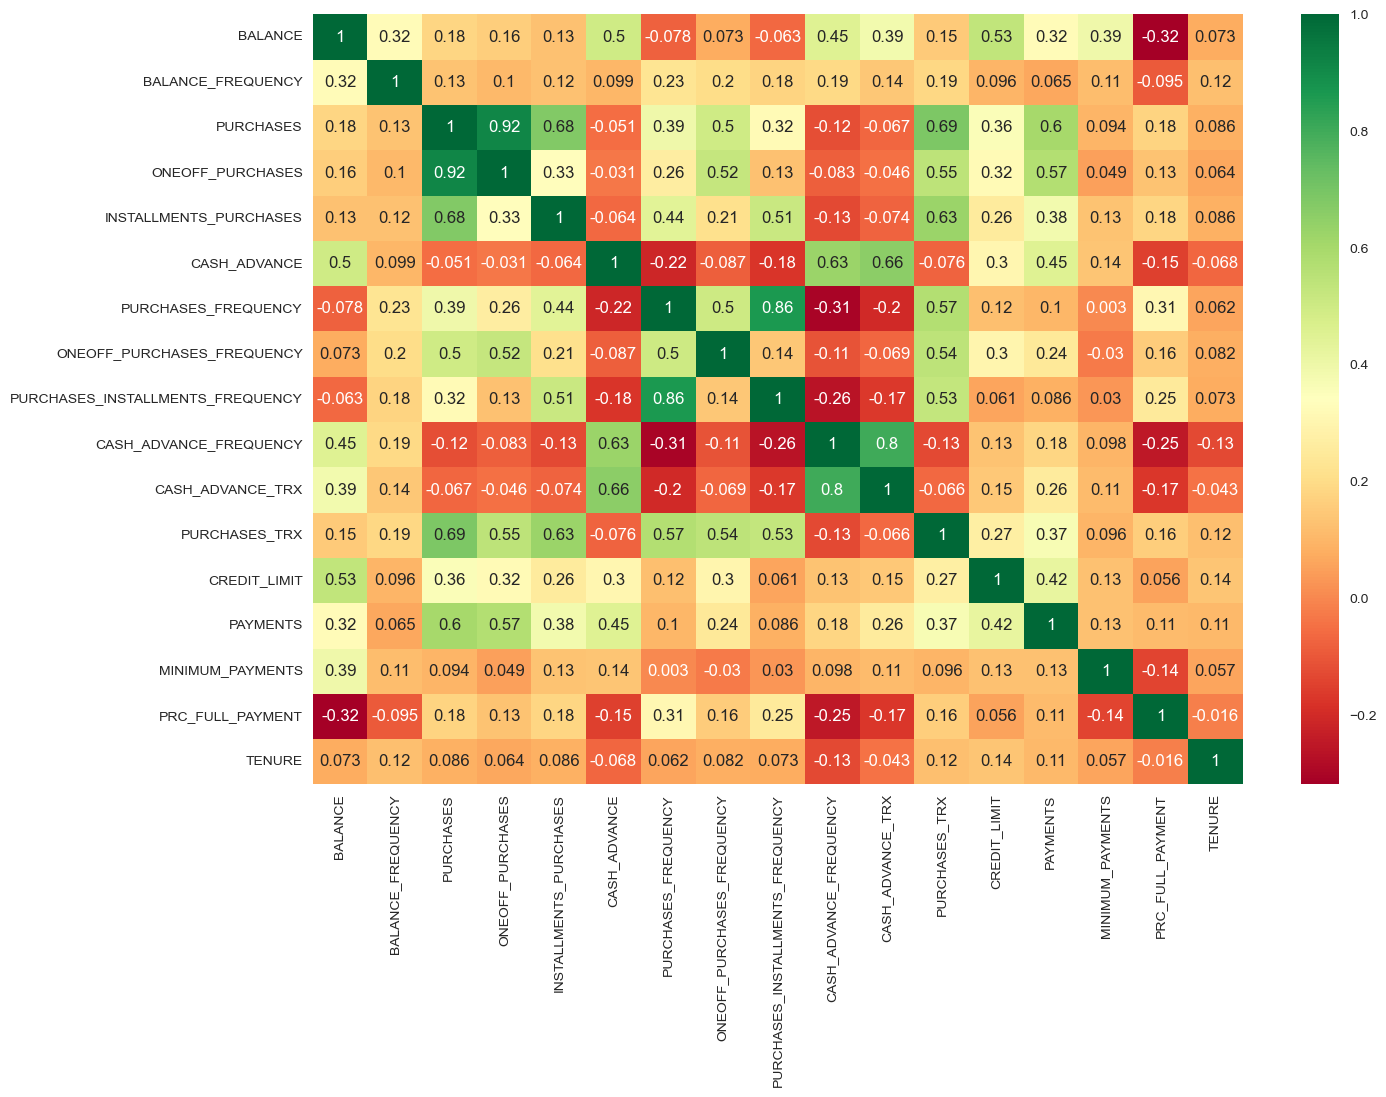

In [14]:
#Memvisualisasikan korelasi data dalam heatmap
df_corr=df.corr()
plt.subplots(figsize=(15,10))
sns.heatmap(df_corr, annot=True,cmap='RdYlGn')

# Save Plot
plt.savefig("corr_chart.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

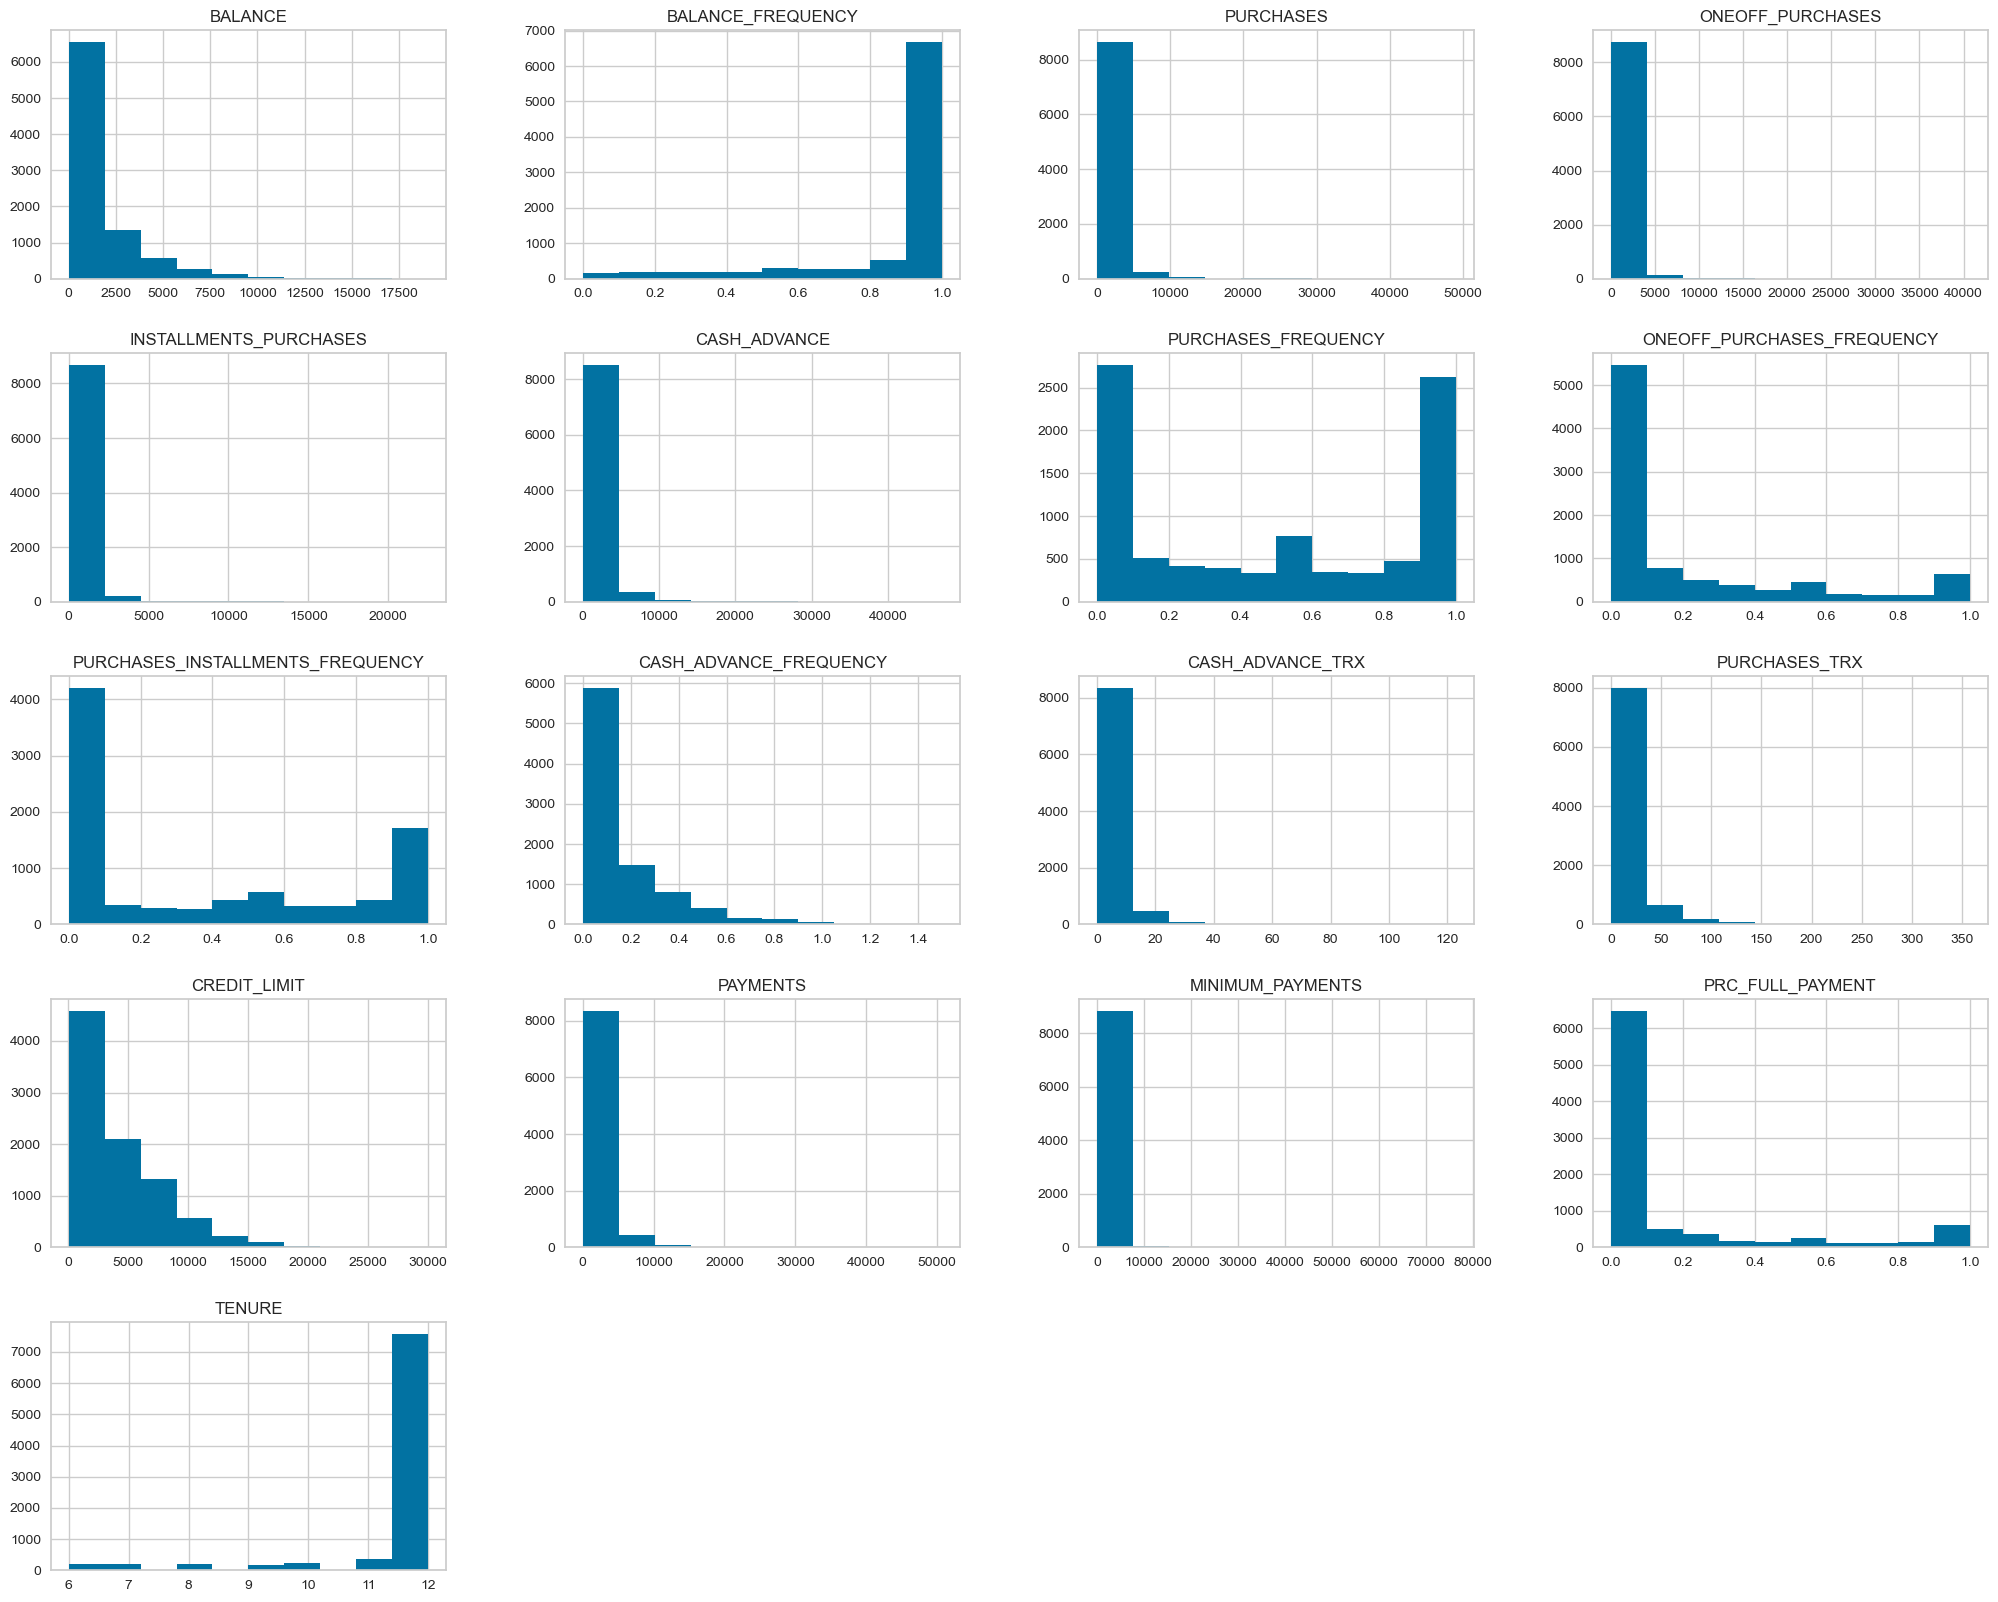

In [15]:
#Membuat histogram pada setiap kolom
df.hist(figsize=(25,20));

# Save Plot
plt.savefig("hist_dist.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

## Data Preprocessing

### Menghapus Feature yang tidak terlalu perlu

Pada feature Customer ID hanya berisi identifikasi unik untuk setiap pelanggan dan tidak memberikan informasi substantif terkait pola atau karakteristik yang ingin dianalisis, maka dapat dianggap tidak relevan untuk proses clustering. Dalam hal ini, menghapus kolom tersebut tidak akan mempengaruhi hasil clustering. Maka dari itu akan kita hapus kolom CUST_ID.

In [16]:
#Menghapus kolom CUST_ID
df.drop(columns=["CUST_ID"], inplace=True)

#Melihat 5 data teratas
df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


Selanjutnya kita akan membuat salinan dataset untuk kita siapkan dalam Hierarchical Clustering, DBSCAN, dan Model inference pada clustering data nantinya.

In [17]:
df_deploy = df.copy()
df_copy = df.copy()
df_copy2= df.copy()

### Data Describe

Kita akan Melihat statistik data untuk data numeric seperti count, mean, standard deviation, maximum, mininum, dan quartile.

In [18]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


### Scaling Data

Scaling digunakan untuk memastikan bahwa fitur-fitur dengan skala yang berbeda memiliki dampak yang seimbang pada model. Salah satu metode scaling umum adalah Standard Scaling (Z-score normalization), di mana setiap nilai fitur diubah sedemikian rupa sehingga memiliki rata-rata nol dan deviasi standar satu.

Kegunaan dari Scaling Data:

1. Stabilisasi Model: Beberapa algoritma machine learning, seperti algoritma berbasis jarak (contohnya K-Means atau K-Nearest Neighbors), sangat dipengaruhi oleh skala fitur. Scaling membantu membuat model lebih stabil dan konvergen lebih cepat.

2. Regresi dan Pengoptimalan: Model-model seperti regresi linier atau metode optimasi numerik sering memerlukan scaling untuk meningkatkan kinerja dan stabilitas.

3. Interpretasi Model: Scaling memudahkan interpretasi model karena parameter model akan memiliki arti yang lebih seragam.

Mendefinisikan variabel a sebagai daftar kolom-kolom dari DataFrame df.

In [19]:
a = [i for i in df.columns]

Membuat objek StandardScaler dari modul sklearn.preprocessing.
Melakukan scaling pada fitur-fitur yang terdapat dalam daftar a menggunakan StandardScaler.

In [20]:
scaler = StandardScaler()
df[a] = scaler.fit_transform(df[a])

df.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068


## Modeling

### K-Means

K-means merupakan suatu algoritme clustering yang digunakan untuk mengevaluasi jumlah optimal dari klaster dalam suatu algoritma K-Means dengan memplot nilai inter-cluster distance untuk berbagai jumlah klaster. Ini adalah bagian dari proses yang dikenal sebagai Elbow Method, yang membantu memilih jumlah klaster yang tepat untuk suatu dataset.

Membuat Plot Elbow Method

In [21]:
interclusterdistance = []

for clusters in range(1,20):
    km = KMeans(n_clusters=clusters, init='k-means++', max_iter=300, random_state=40)
    km.fit(df)
    interclusterdistance.append(km.inertia_)

C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

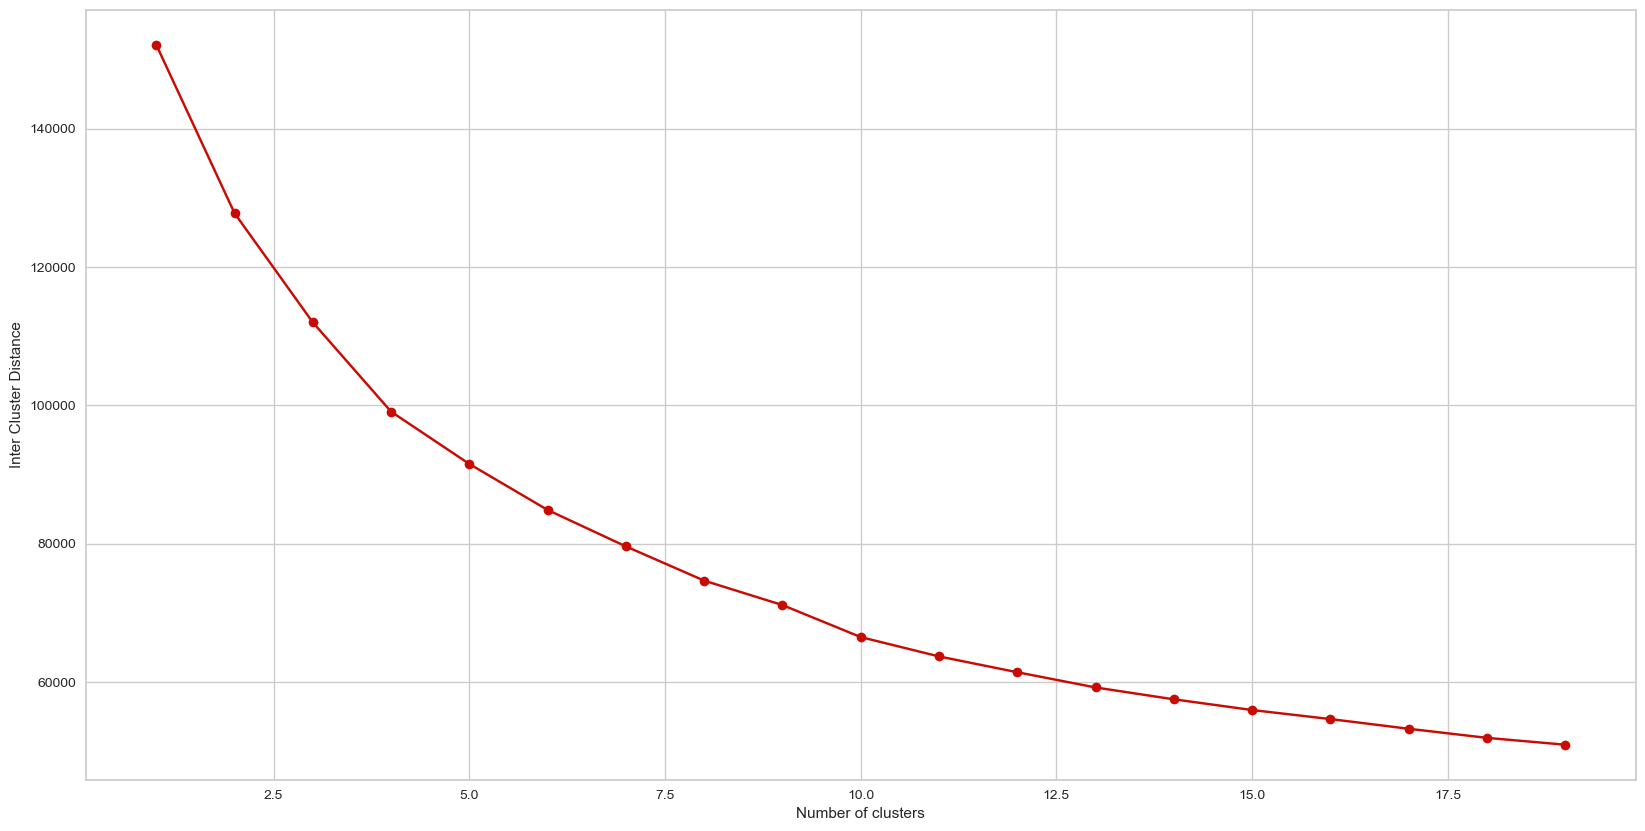

In [22]:
plt.figure(figsize=(20,10))
plt.plot(range(1, 20), interclusterdistance, marker='o', color='r')
plt.xlabel('Number of clusters')
plt.ylabel('Inter Cluster Distance')
plt.show()

Selanjutnya kita akan melakukan pengelompokkan (clustering) menggunakan algoritma K-Means dengan 6 klaster.

1. Inisialisasi Model K-Means

In [23]:
k_m = KMeans(n_clusters=6, init='k-means++', max_iter=300, random_state=35)

2. Melatih Model dan Memprediksi Klaster

In [24]:
model1 = k_m.fit(df)
y_pred = k_m.predict(df)

C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


3. Membuat DataFrame untuk Hasil Clustering

In [25]:
clustering_df = pd.DataFrame(df, columns=df.columns)
clustering_df['CLUSTERS'] = y_pred

In [26]:
clustering_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,-0.731989,-0.249434,-0.424900,-0.356934,-0.349079,-0.466786,-0.806490,-0.678661,-0.707313,-0.675349,-0.476070,-0.511333,-0.960433,-0.528979,-3.109675e-01,-0.525551,0.36068,2
1,0.786961,0.134325,-0.469552,-0.356934,-0.454576,2.605605,-1.221758,-0.678661,-0.916995,0.573963,0.110074,-0.591796,0.688639,0.818642,8.931021e-02,0.234227,0.36068,5
2,0.447135,0.518084,-0.107668,0.108889,-0.454576,-0.466786,1.269843,2.673451,-0.916995,-0.675349,-0.476070,-0.109020,0.826062,-0.383805,-1.016632e-01,-0.525551,0.36068,0
3,0.049099,-1.016953,0.232058,0.546189,-0.454576,-0.368653,-1.014125,-0.399319,-0.916995,-0.258913,-0.329534,-0.551565,0.826062,-0.598688,4.878305e-17,-0.525551,0.36068,2
4,-0.358775,0.518084,-0.462063,-0.347294,-0.454576,-0.466786,-1.014125,-0.399319,-0.916995,-0.675349,-0.476070,-0.551565,-0.905464,-0.364368,-2.657913e-01,-0.525551,0.36068,2
5,0.117878,0.518084,0.154492,-0.356934,1.019822,-0.466786,0.439310,-0.678661,0.550784,-0.675349,-0.476070,-0.269945,-0.740557,-0.115060,6.621186e-01,-0.525551,0.36068,3
6,-0.450277,0.518084,2.849408,3.500548,0.306664,-0.466786,1.269843,2.673451,1.599199,-0.675349,-0.476070,1.983008,2.475134,1.596313,-2.858411e-01,2.893453,0.36068,0
7,0.124520,0.518084,-0.265388,-0.356934,0.027792,-0.466786,1.269843,-0.678661,1.599199,-0.675349,-0.476070,-0.109020,-0.603134,-0.364116,-1.425353e-01,-0.525551,0.36068,3
8,-0.264026,0.518084,-0.066330,0.041603,-0.233408,-0.466786,-0.391225,-0.399319,-0.287947,-0.675349,-0.476070,-0.390639,0.688639,-0.360933,-2.369677e-01,-0.525551,0.36068,2
9,-0.678504,-1.400712,0.130303,0.415209,-0.454576,-0.466786,-0.806490,-0.119974,-0.916995,-0.675349,-0.476070,-0.471102,1.788021,-0.196336,-3.277915e-01,-0.525551,0.36068,1


In [27]:
clustering_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   float64
 11  PURCHASES_TRX                     8950 non-null   float64
 12  CREDIT

Lalu kita melihat berapa value yang ada pada setiap 6 clusters

In [28]:
clustering_df['CLUSTERS'].value_counts()

2    3037
3    2245
1    1315
0    1307
5     969
4      77
Name: CLUSTERS, dtype: int64

Membuat FacetGrid

FacetGrid yang berisi histogram untuk setiap fitur dalam dataset, dengan setiap klaster direpresentasikan dalam kolom yang berbeda. Ini membantu dalam memahami distribusi nilai-fitur di dalam setiap klaster

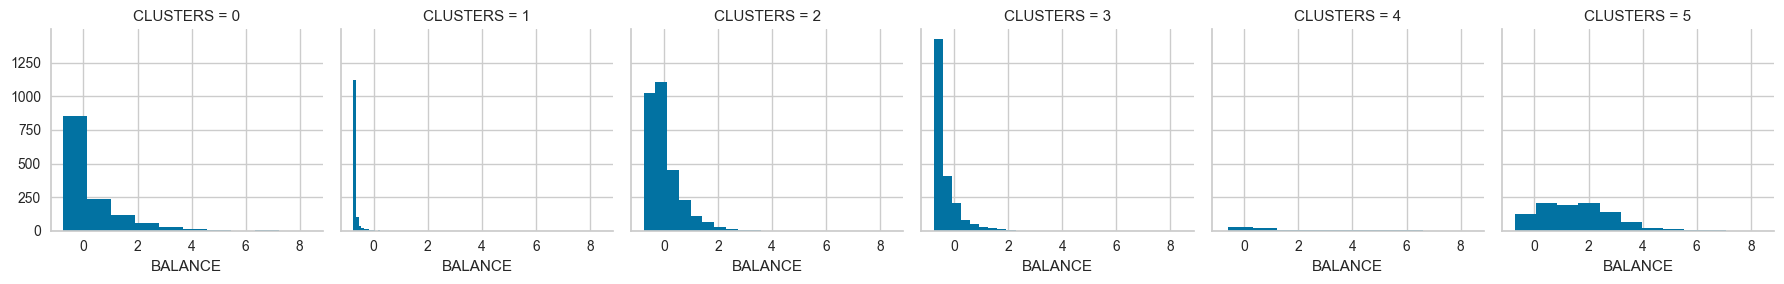

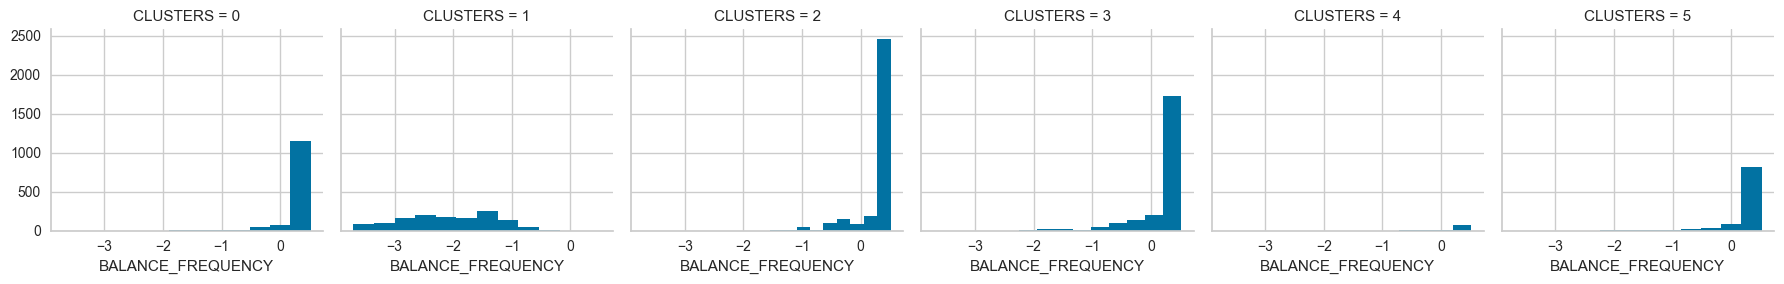

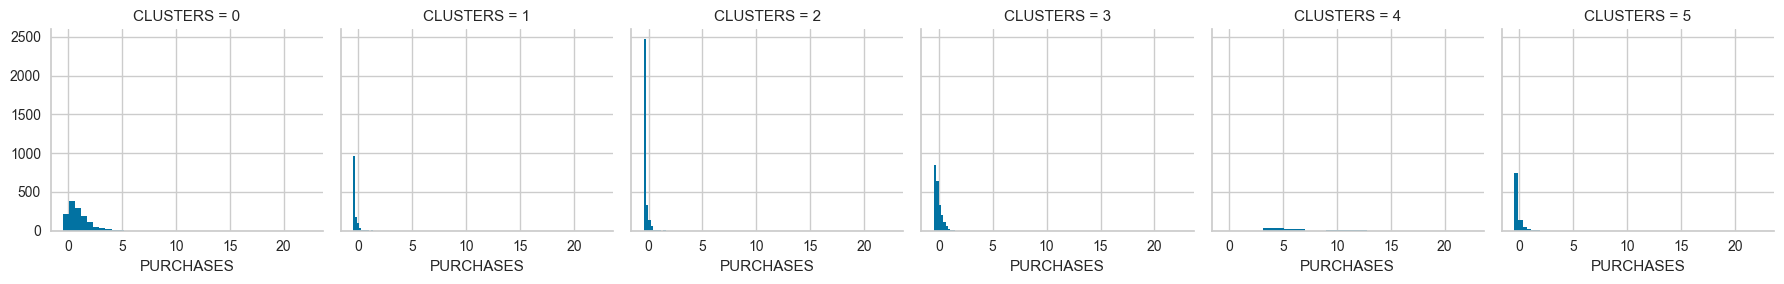

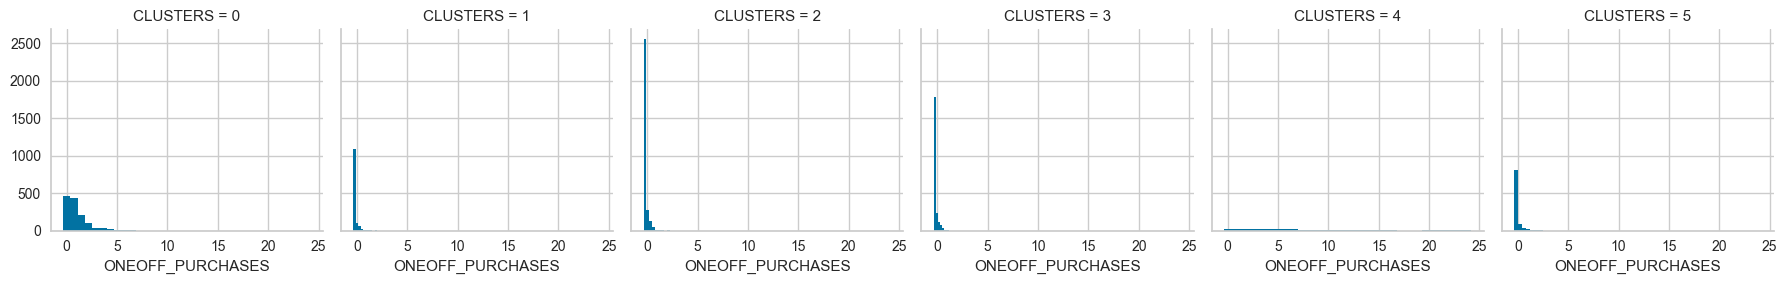

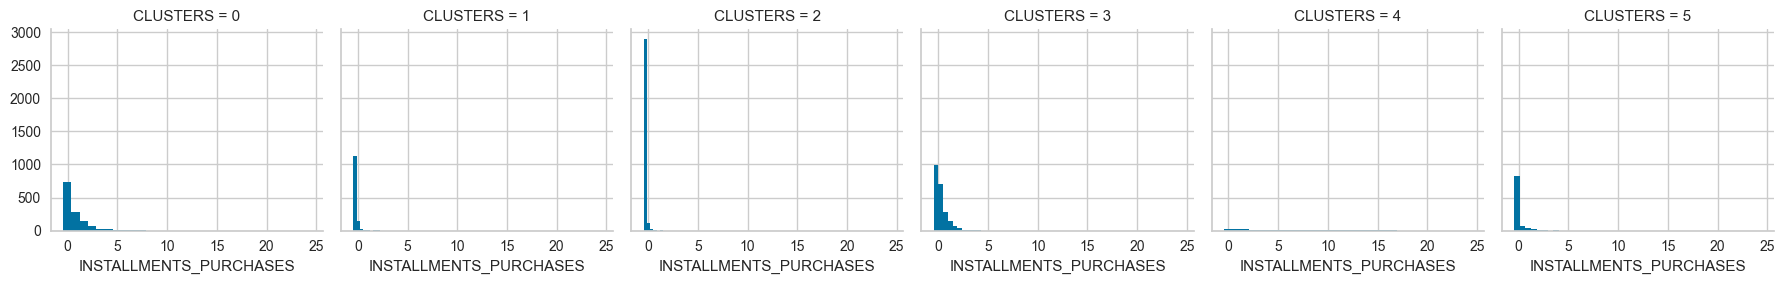

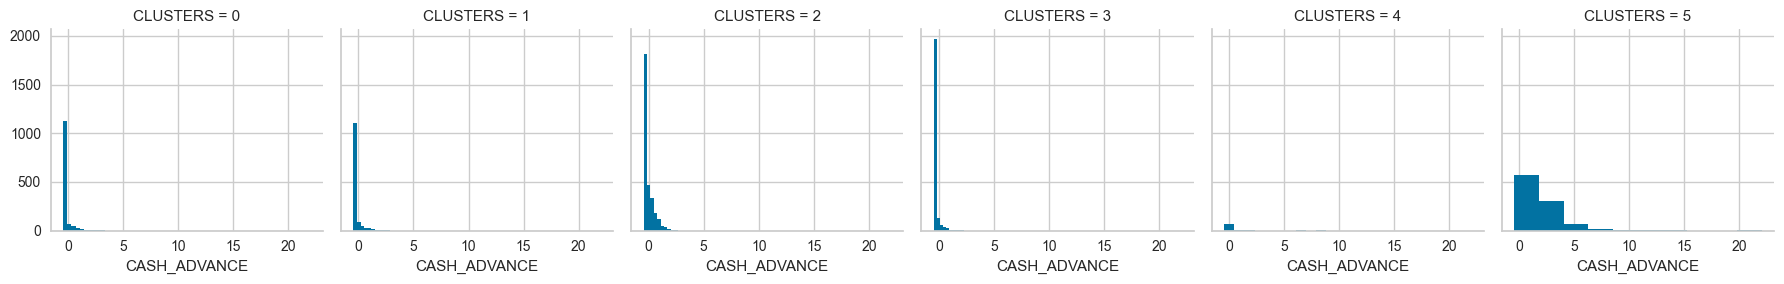

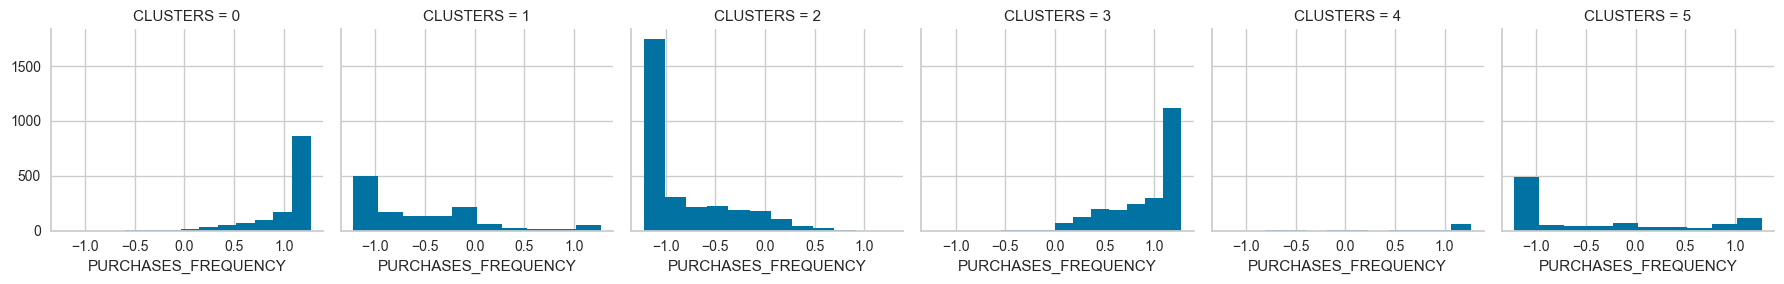

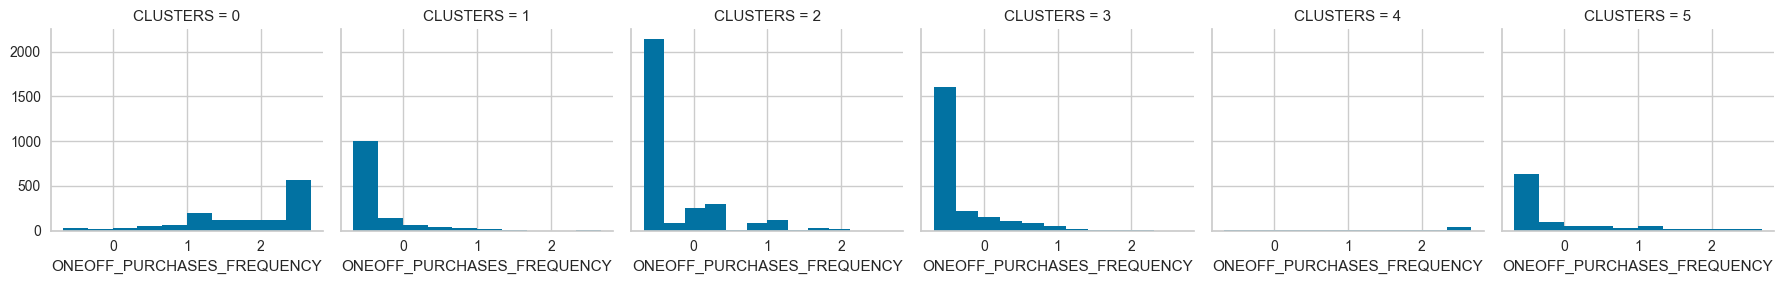

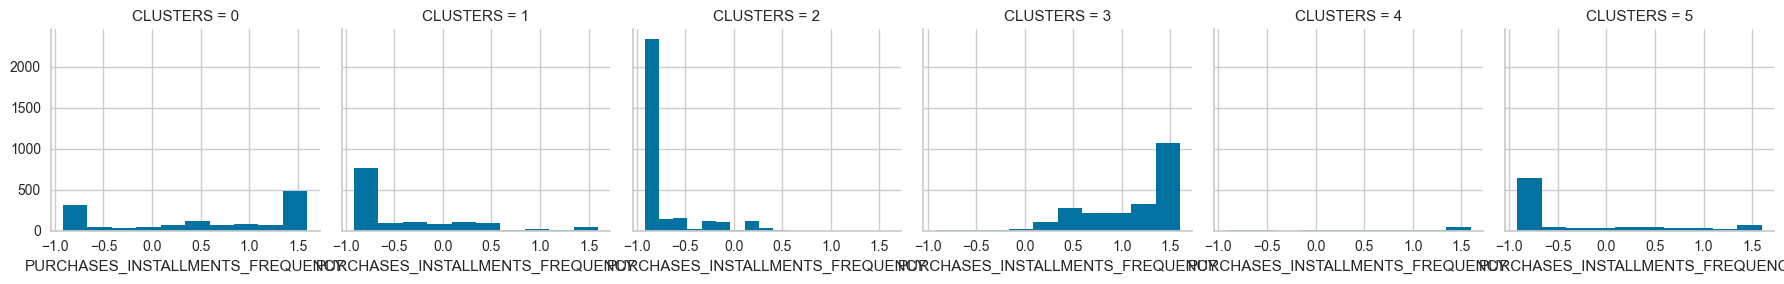

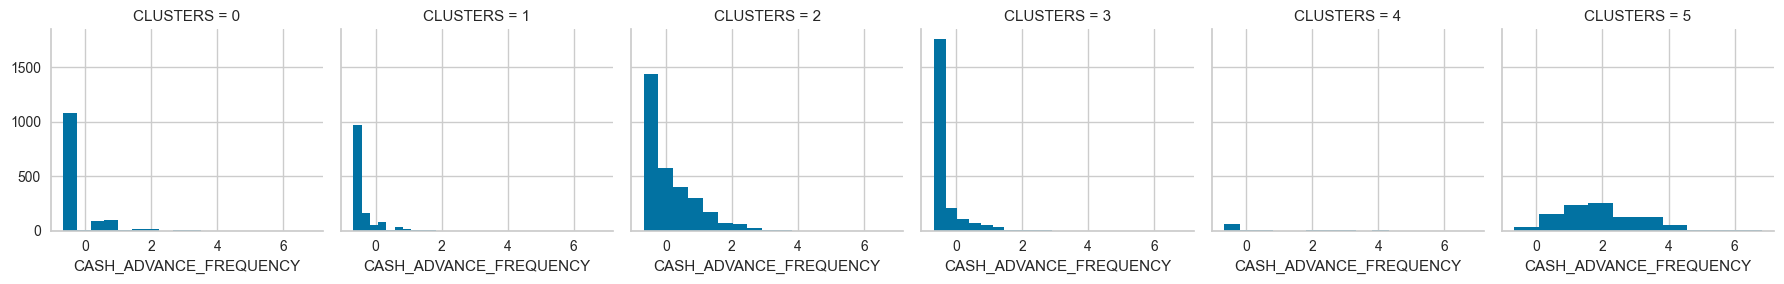

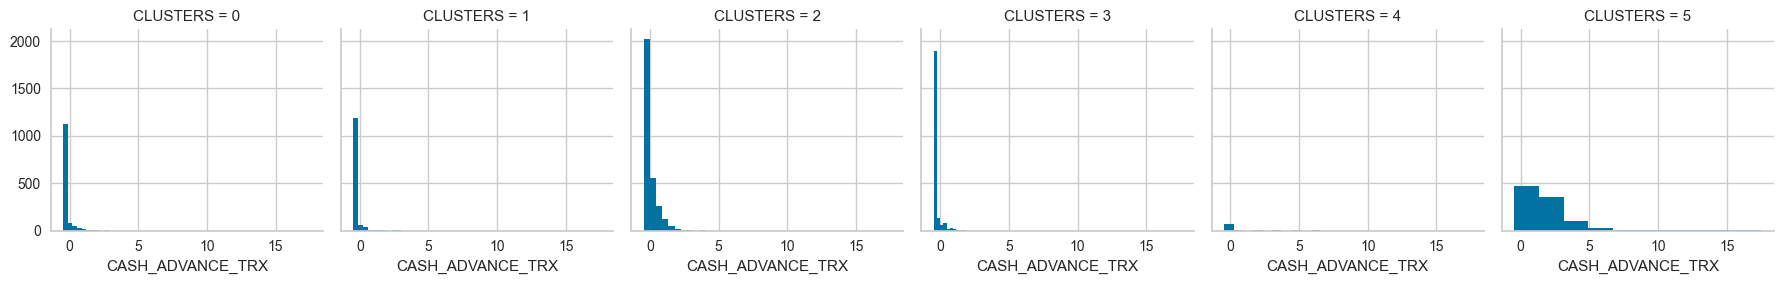

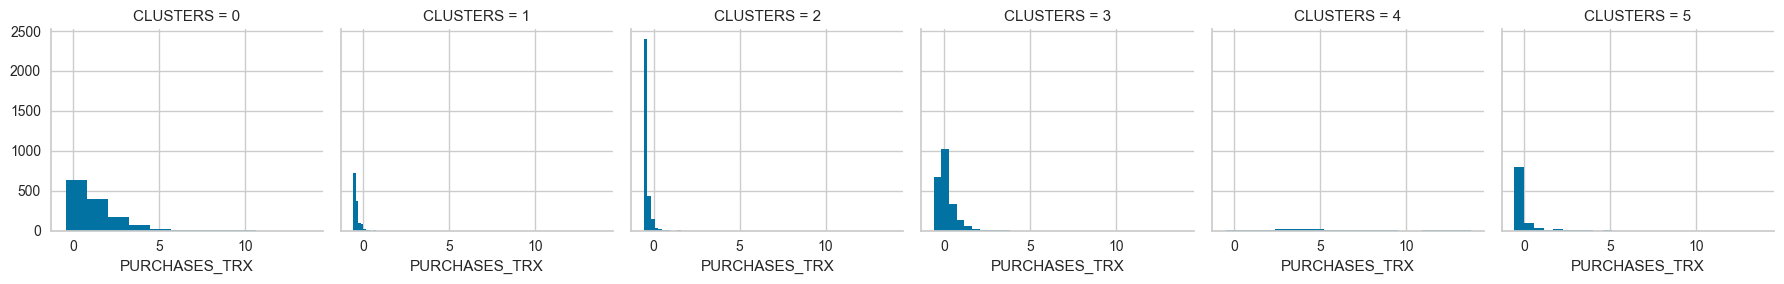

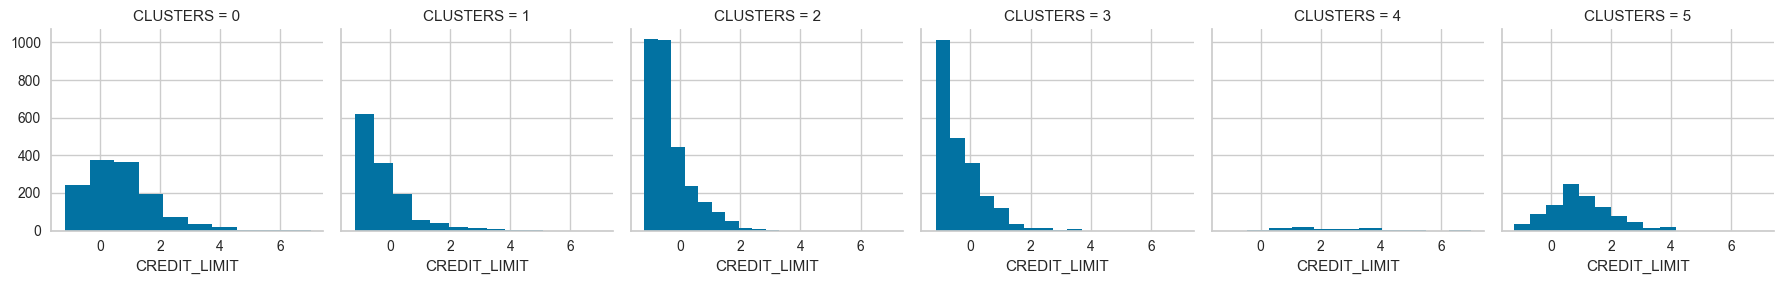

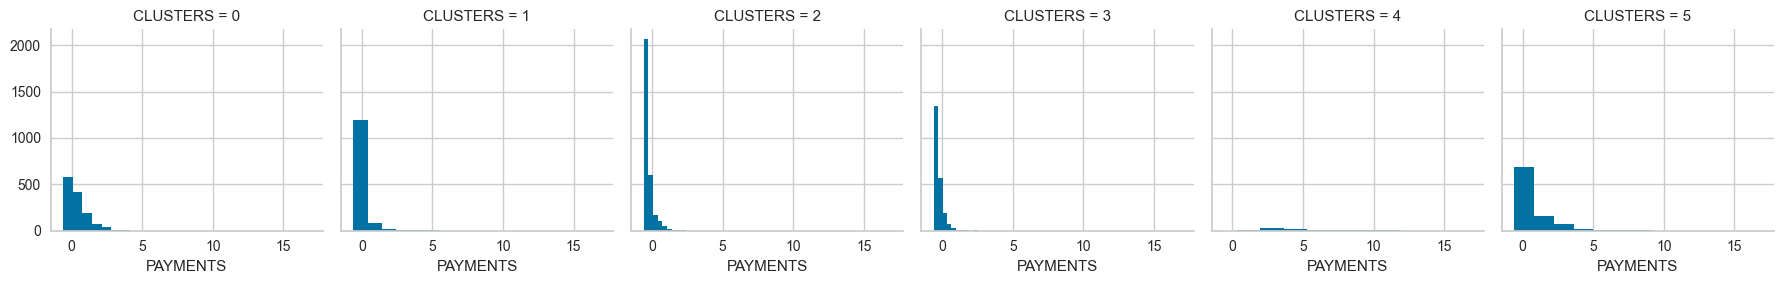

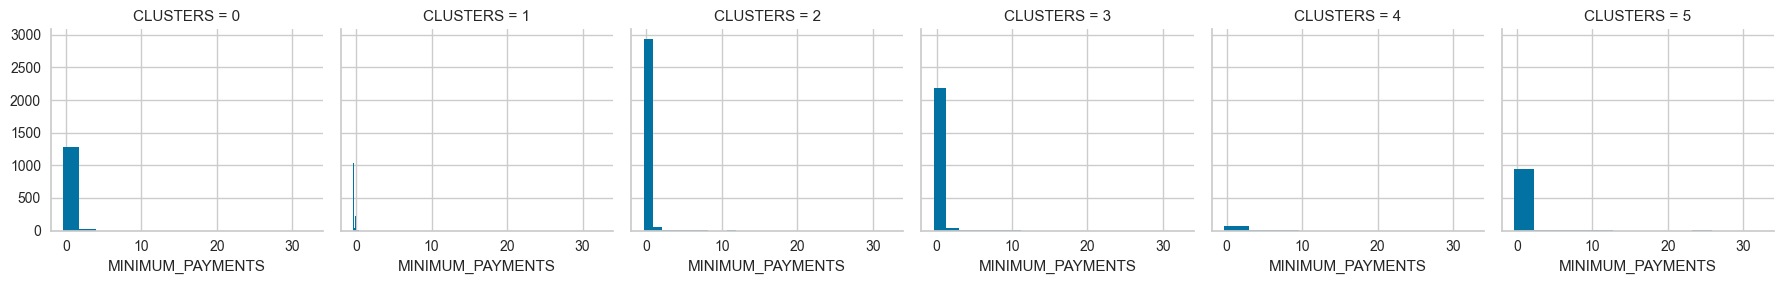

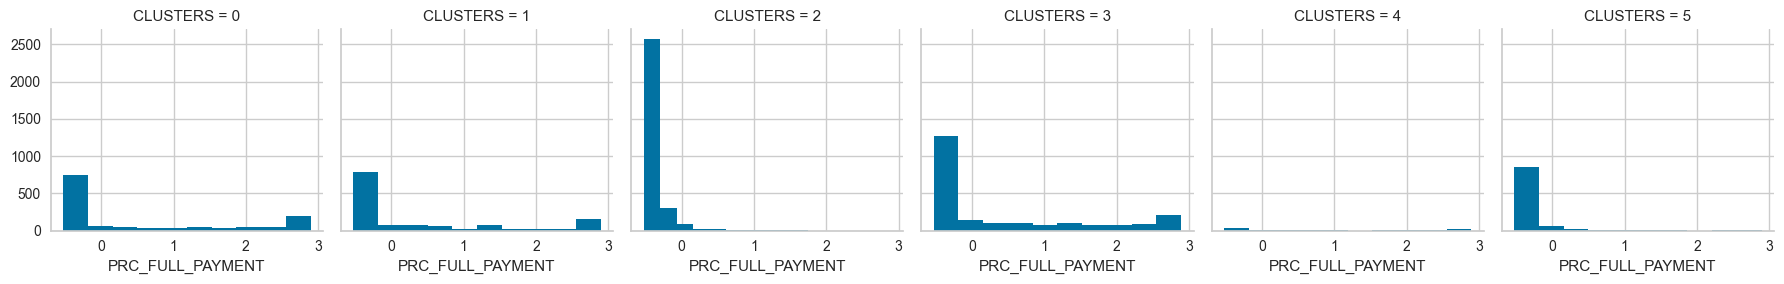

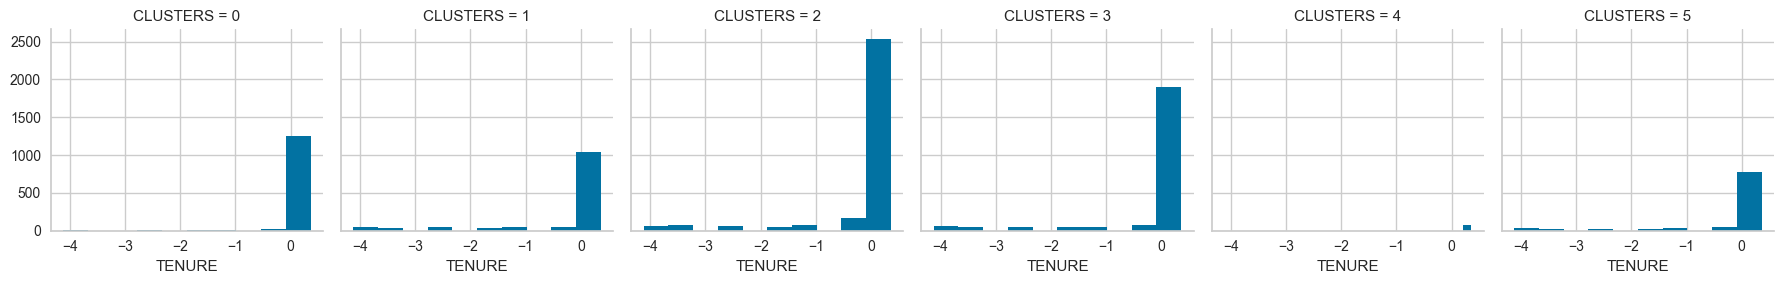

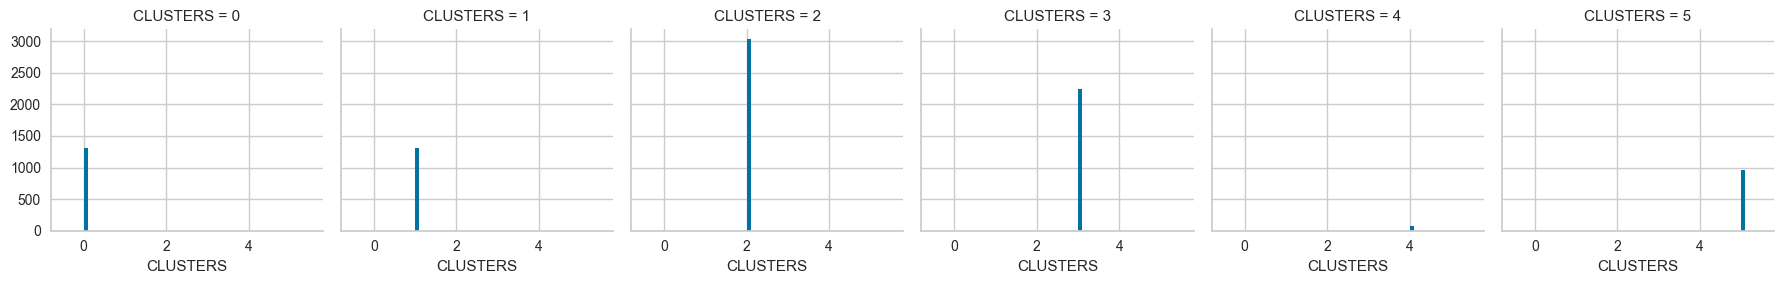

In [29]:
for c in clustering_df:
    grid= sns.FacetGrid(clustering_df, col='CLUSTERS')
    grid.map(plt.hist, c)

<b>ANALISIS YANG DIDAPAT DARI DIAGRAM DIATAS</b>

Dalam analisis diagram ini, terdapat enam klaster yang diperoleh dari hasil clustering. Masing-masing klaster memiliki karakteristik yang dapat diidentifikasi berdasarkan kriteria-kriteria tertentu.

1. <b>Cluster 0:</b>
Klaster ini ditunjukkan oleh jumlah saldo yang tinggi dalam akun, memungkinkan pengguna untuk melakukan pembelian dengan frekuensi yang cukup tinggi. Kriteria lainnya melibatkan kredit limit yang besar, suku bunga yang tinggi, dan tenor yang panjang. Jumlah pengguna dalam klaster ini lebih rendah dibandingkan dengan Cluster 3 dan 1.
<br>
<br>
2. <b>Cluster 1:</b>
Klaster ini ditunjukkan oleh jumlah saldo yang rendah dalam akun, namun tetap mampu melakukan pembelian dengan frekuensi yang tinggi. Kriteria lainnya termasuk kredit limit yang sedang, suku bunga yang tidak terlalu tinggi, dan tenor yang lebih panjang dibandingkan dengan Cluster 0. Jumlah pengguna dalam klaster ini lebih rendah dari Cluster 3.
<br>
<br>
3. <b>Cluster 2:</b>
Klaster ini ditunjukkan oleh jumlah saldo yang tinggi dalam akun, memungkinkan pembelian dengan frekuensi rata-rata. Kriteria lainnya melibatkan kredit limit yang cukup tinggi, suku bunga yang rata-rata, dan tenor yang lebih cepat dibandingkan dengan Cluster 1. Jumlah pengguna dalam klaster ini lebih tinggi dari Cluster 5.
<br>
<br>
4. <b>Cluster 3:</b>
Klaster ini ditunjukkan oleh jumlah saldo yang cukup tinggi dalam akun, memungkinkan pembelian dengan frekuensi di bawah rata-rata. Kriteria lainnya termasuk kredit limit yang rata-rata, suku bunga yang sedikit di atas rata-rata, dan tenor yang agak lebih lama dibandingkan dengan Cluster 2. Jumlah pengguna dalam klaster ini lebih tinggi dari seluruh klaster lainnya.
<br>
<br>
5. <b>Cluster 4:</b>
Klaster ini ditunjukkan oleh jumlah saldo yang sangat rendah dalam akun, namun tetap mampu melakukan pembelian dengan frekuensi di atas rata-rata. Kriteria lainnya melibatkan kredit limit di atas rata-rata, suku bunga yang dua kali lipat lebih tinggi dari Cluster 2, dan tenor yang lebih lama dibandingkan dengan Cluster 1, Cluster 2, dan Cluster 3. Jumlah pengguna dalam klaster ini lebih rendah dari Cluster 0, Cluster 1, dan Cluster 3, namun lebih tinggi dari Cluster 2 dan Cluster 5.
<br>
<br>
6. <b>Cluster 5:</b>
Klaster ini ditunjukkan oleh jumlah saldo yang sangat tinggi dalam akun, memungkinkan pembelian dengan frekuensi di atas rata-rata. Kriteria lainnya termasuk kredit limit yang besar, suku bunga yang rendah, dan tenor yang lebih cepat dibandingkan dengan seluruh klaster. Jumlah pengguna dalam klaster ini lebih rendah dari seluruh klaster.

### Hierarchical Clustering

Hierarchical clustering adalah metode analisis klaster yang digunakan untuk mengelompokkan objek-objek data ke dalam kelompok atau klaster berdasarkan kesamaan mereka. Metode ini membangun struktur hirarki klaster dengan cara menggabungkan atau membagi klaster secara berurutan.

In [30]:
data_scaled = normalize(df_copy)
data_scaled = pd.DataFrame(data_scaled, columns=df_copy.columns)
data_scaled.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,0.039353,0.000787,0.091790,0.000000,0.09179,0.000000,0.000160,0.000000,0.00008,0.000000,0.000000,0.001924,0.962156,0.194165,0.134230,0.00000,0.011546
1,0.293876,0.000083,0.000000,0.000000,0.00000,0.591240,0.000000,0.000000,0.00000,0.000023,0.000367,0.000000,0.642358,0.376516,0.098404,0.00002,0.001101
2,0.310798,0.000125,0.096307,0.096307,0.00000,0.000000,0.000125,0.000125,0.00000,0.000000,0.000000,0.001495,0.934206,0.077485,0.078135,0.00000,0.001495
3,0.207829,0.000079,0.186921,0.186921,0.00000,0.025661,0.000010,0.000010,0.00000,0.000010,0.000125,0.000125,0.935229,0.000000,0.107764,0.00000,0.001496
4,0.504284,0.000617,0.009867,0.009867,0.00000,0.000000,0.000051,0.000051,0.00000,0.000000,0.000000,0.000617,0.740040,0.418329,0.150963,0.00000,0.007400


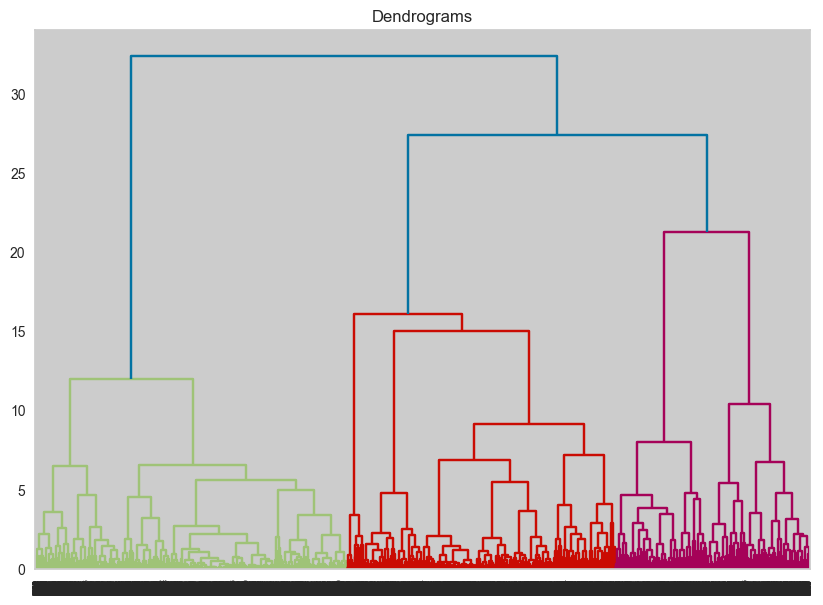

In [31]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dendro = shc.dendrogram(shc.linkage(data_scaled, method='ward'))

# Save Plot
plt.savefig("hier_graph_1.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

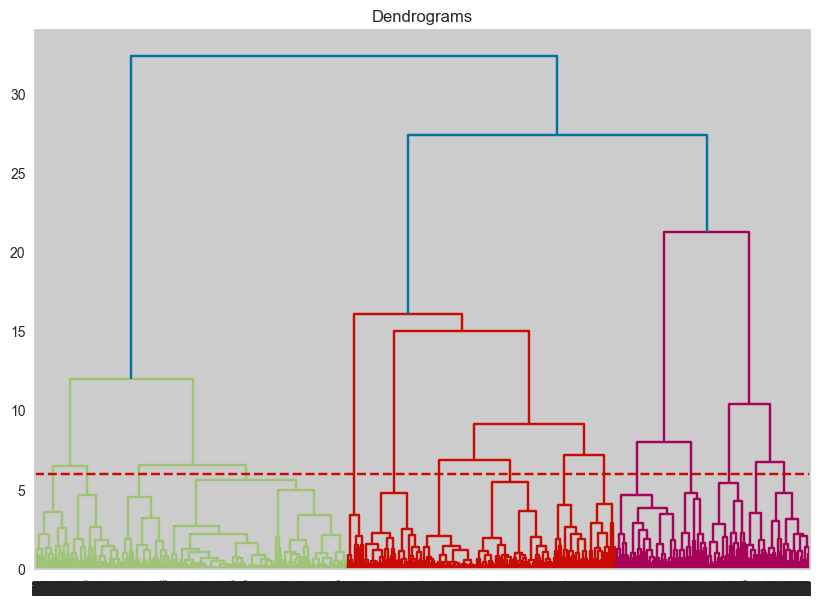

In [32]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dendro = shc.dendrogram(shc.linkage(data_scaled, method='ward'));
plt.axhline(y=6, color='r', linestyle='--');

# Save Plot
plt.savefig("hier_graph_2.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

In [33]:
hier = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
model2 = hier.fit(data_scaled)
y_pred2 = hier.fit_predict(data_scaled)

C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
C:\Users\MINAN\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [34]:
hier_df = pd.DataFrame(df_copy,columns = df_copy.columns)
hier_df['CLUSTERS'] = y_pred2
hier_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,1
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,1
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,1
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,1
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,1
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,1


In [35]:
hier_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

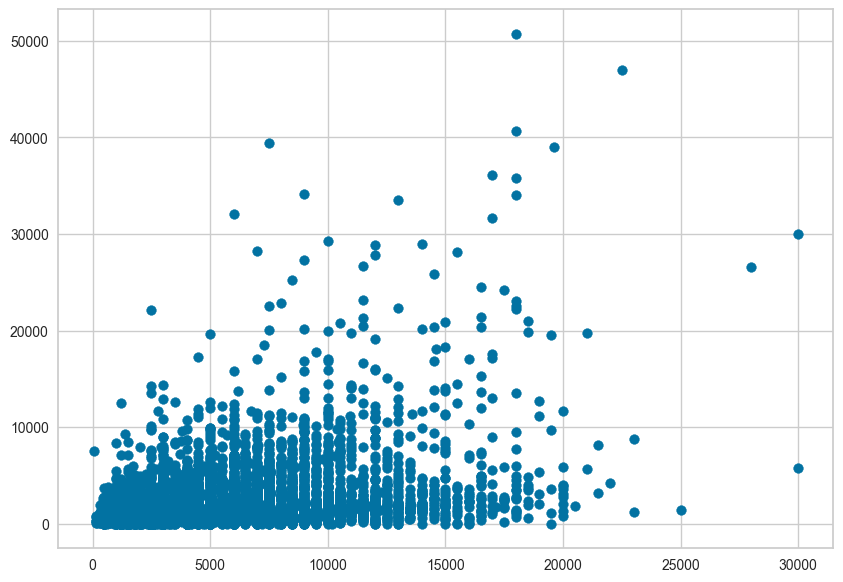

In [36]:
plt.figure(figsize=(10, 7))  
plt.scatter(hier_df['CREDIT_LIMIT'], hier_df['PAYMENTS'])

# Save Plot
plt.savefig("hier_graph_3.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

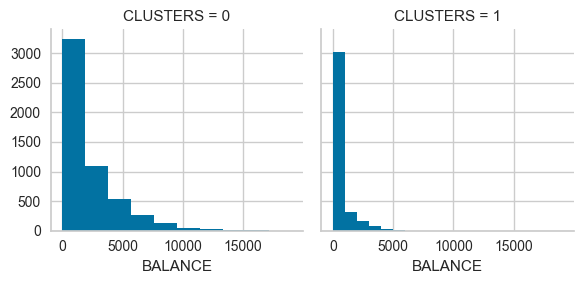

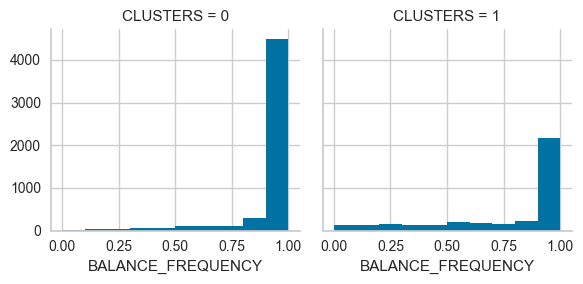

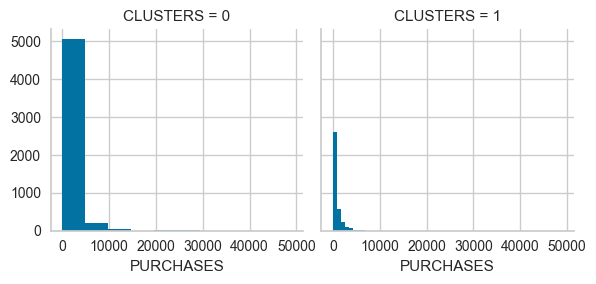

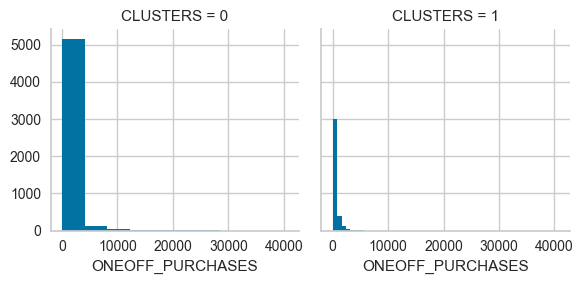

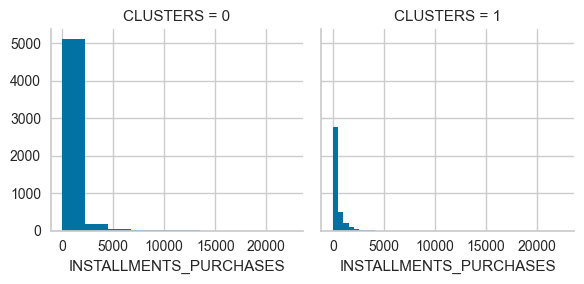

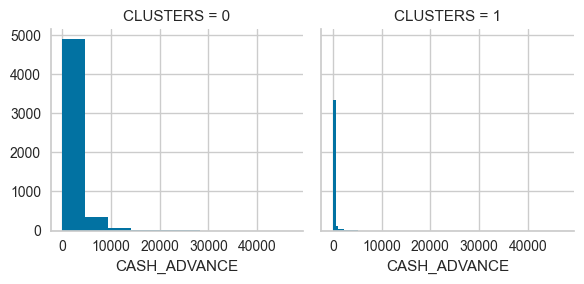

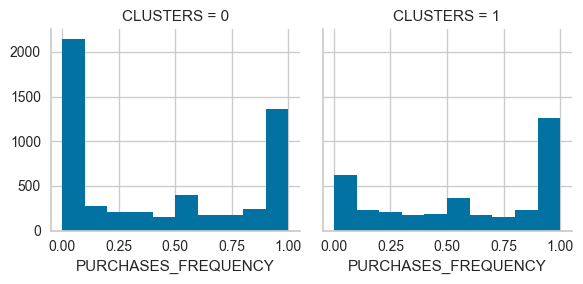

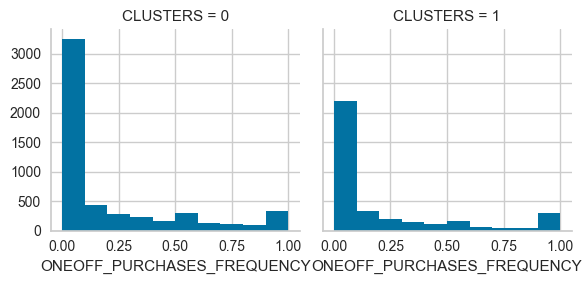

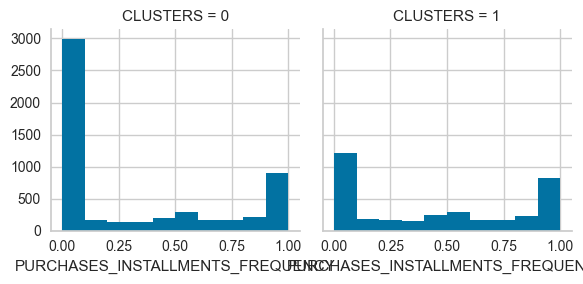

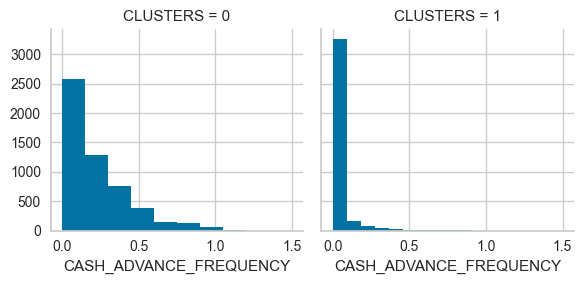

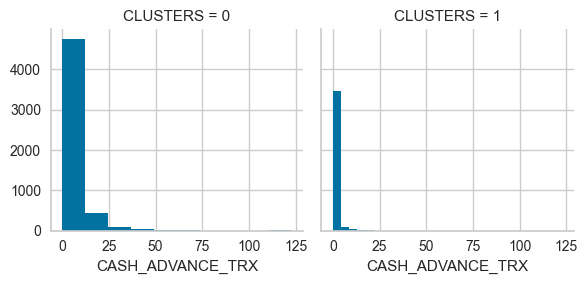

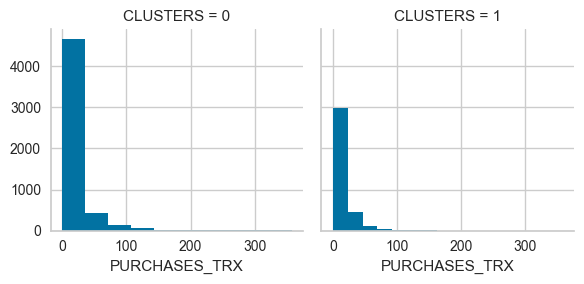

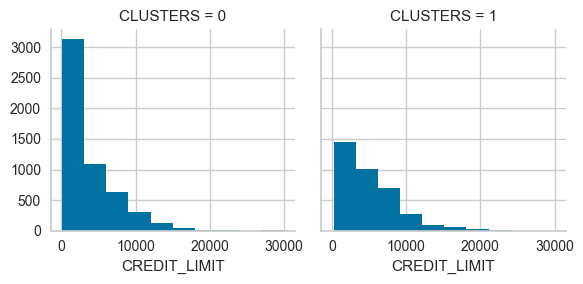

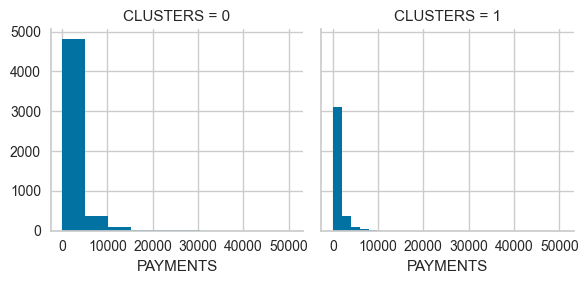

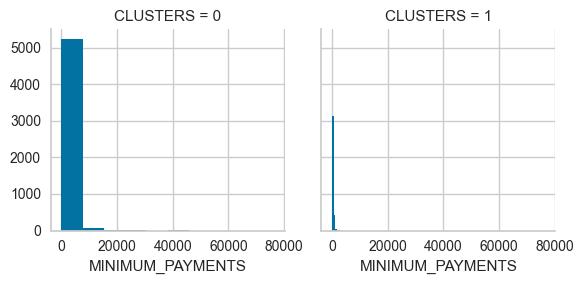

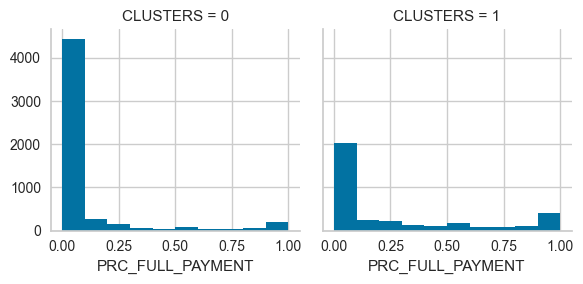

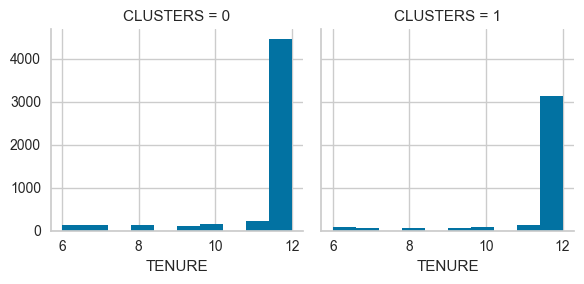

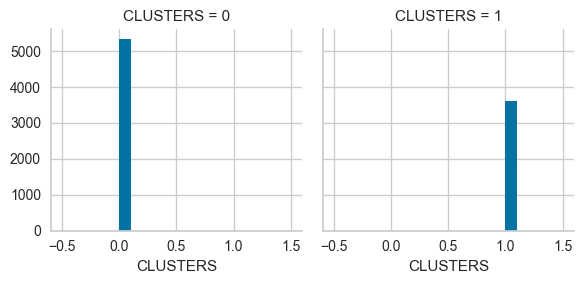

In [37]:
for c in hier_df:
    grid= sns.FacetGrid(hier_df, col='CLUSTERS')
    grid.map(plt.hist, c)
    
# Save Plot
plt.savefig("hier_clust.png",
            bbox_inches ="tight",
            pad_inches = 1,
            transparent = True,
            orientation ='landscape')

**ANALISIS DIAGRAM**

1. Cluster 0: Terdapat lebih dari 3000 pengguna kartu kredit (< 5000) dalam cluster ini, yang merupakan jumlah lebih tinggi dibandingkan dengan Cluster 1. Beberapa aspek yang dapat diamati meliputi:
- Frekuensi pengguna yang telah melakukan pembayaran kartu kredit lebih dari 4000 pengguna.
- Pengguna dengan kredit limit di bawah 10,000 (< 10,000) lebih banyak dibandingkan dengan Cluster 1.
- Jumlah pengguna dengan suku bunga di bawah 0.25 lebih besar dibandingkan dengan Cluster 1.
- Jumlah pengguna dengan tenor pembayaran yang lebih banyak dibandingkan dengan Cluster 1.



2. Cluster 1: Terdapat lebih dari 3000 pengguna kartu kredit (< 3000) dalam cluster ini. Beberapa aspek yang dapat diamati meliputi:
- Frekuensi pengguna yang telah melakukan pembayaran kartu kredit lebih dari 3000 pengguna.
- Pengguna dengan kredit limit di bawah 10,000 (< 10,000) lebih sedikit dibandingkan dengan Cluster 0.
- Jumlah pengguna dengan suku bunga di antara 0.50 - 1.00 lebih besar dibandingkan dengan Cluster 0.
- Jumlah pengguna dengan tenor pembayaran yang lebih sedikit dibandingkan dengan Cluster 0.

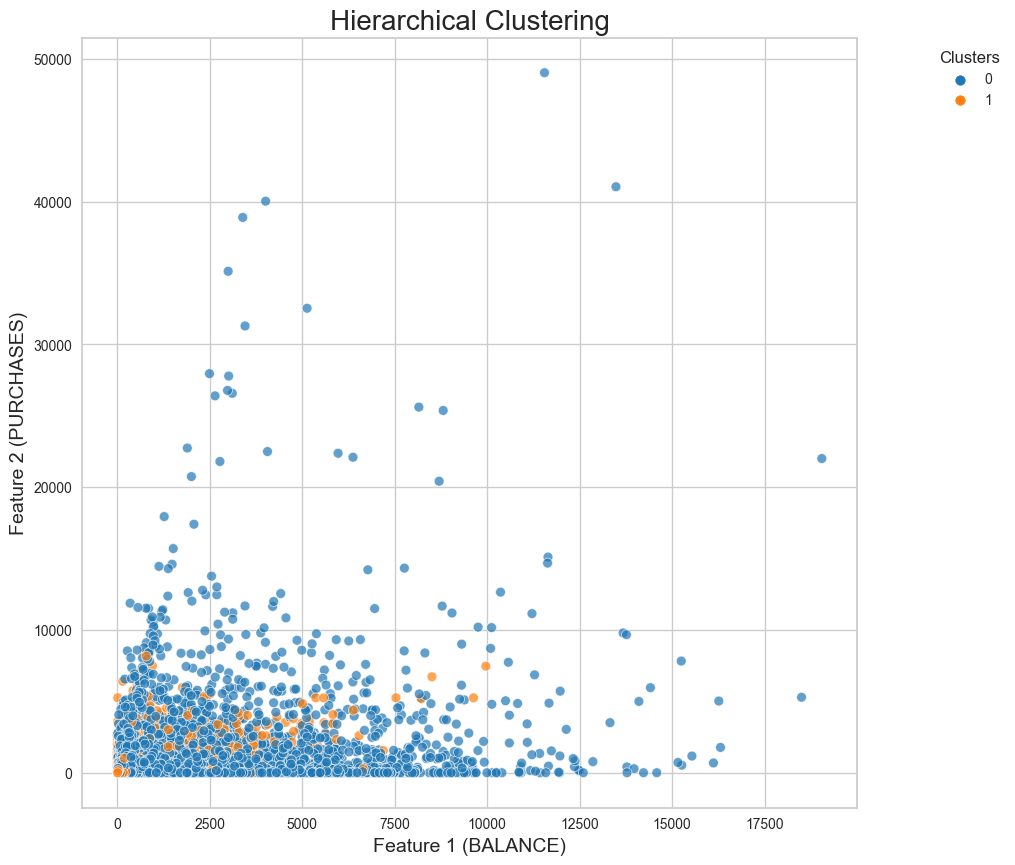

In [50]:
# Assuming 'CLUSTERS' is a column in your DataFrame hier_df
plt.figure(figsize=(10, 10))
sns.scatterplot(data=hier_df, x='BALANCE', y='PURCHASES', hue='CLUSTERS', palette='tab10', s=50, alpha=0.7)
plt.title('Hierarchical Clustering', fontsize=20)
plt.xlabel('Feature 1 (BALANCE)', fontsize=14)
plt.ylabel('Feature 2 (PURCHASES)', fontsize=14)

# Show legend
plt.legend(title='Clusters', loc='upper right', bbox_to_anchor=(1.2, 1))

# Save the plot
plt.savefig("hierarchical_clust.png", bbox_inches="tight", pad_inches=1, transparent=True, orientation='landscape')

# Show the plot
plt.show()

### DBScan Clustering

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) adalah sebuah metode clustering yang berfokus pada kepadatan data. DBSCAN mengelompokkan objek-objek dalam dataset berdasarkan kedekatan spasial dan kepadatan data di sekitarnya.

In [38]:
dbscan = DBSCAN(eps=2,min_samples=6)
df_dbscan= dbscan.fit(data_scaled)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
dbscan_df = pd.DataFrame(df_copy2,columns = df_copy2.columns)
dbscan_df['CLUSTERS'] = y_dbscan_pred
dbscan_df.head(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,0
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,0
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,864.206542,0.000000,12,0
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,0
5,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.000000,0,8,1800.0,1400.057770,2407.246035,0.000000,12,0
6,627.260806,1.000000,7091.01,6402.63,688.38,0.000000,1.000000,1.000000,1.000000,0.000000,0,64,13500.0,6354.314328,198.065894,1.000000,12,0
7,1823.652743,1.000000,436.20,0.00,436.20,0.000000,1.000000,0.000000,1.000000,0.000000,0,12,2300.0,679.065082,532.033990,0.000000,12,0
8,1014.926473,1.000000,861.49,661.49,200.00,0.000000,0.333333,0.083333,0.250000,0.000000,0,5,7000.0,688.278568,311.963409,0.000000,12,0
9,152.225975,0.545455,1281.60,1281.60,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,3,11000.0,1164.770591,100.302262,0.000000,12,0


In [40]:
dbscan_df.tail(10)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
8940,130.838554,1.000000,591.24,0.00,591.24,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,475.523262,82.771320,1.00,6,0
8941,5967.475270,0.833333,214.55,0.00,214.55,8555.409326,0.833333,0.000000,0.666667,0.666667,13,5,9000.0,966.202912,861.949906,0.00,6,0
8942,40.829749,1.000000,113.28,0.00,113.28,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,94.488828,86.283101,0.25,6,0
8943,5.871712,0.500000,20.90,20.90,0.00,0.000000,0.166667,0.166667,0.000000,0.000000,0,1,500.0,58.644883,43.473717,0.00,6,0
8944,193.571722,0.833333,1012.73,1012.73,0.00,0.000000,0.333333,0.333333,0.000000,0.000000,0,2,4000.0,0.000000,864.206542,0.00,6,0
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6,0
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,864.206542,0.00,6,0
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6,0
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6,0
8949,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6,0


In [41]:
dbscan_df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTERS
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.0
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318,0.0
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.612411,2895.063757,2330.588021,0.292499,1.338331,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000,0.0
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,170.857654,0.000000,12.000000,0.0
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,335.628312,0.000000,12.000000,0.0
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,864.206542,0.142857,12.000000,0.0
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000,0.0


In [42]:
Y = dbscan_df[['BALANCE','PURCHASES']].to_numpy()

In [43]:
dbscan = DBSCAN(eps=0.075,min_samples=2)
dbscan.fit(Y)
y_dbscan_pred = dbscan.labels_
y_dbscan_pred

array([-1, -1, -1, ..., -1, 85, -1], dtype=int64)

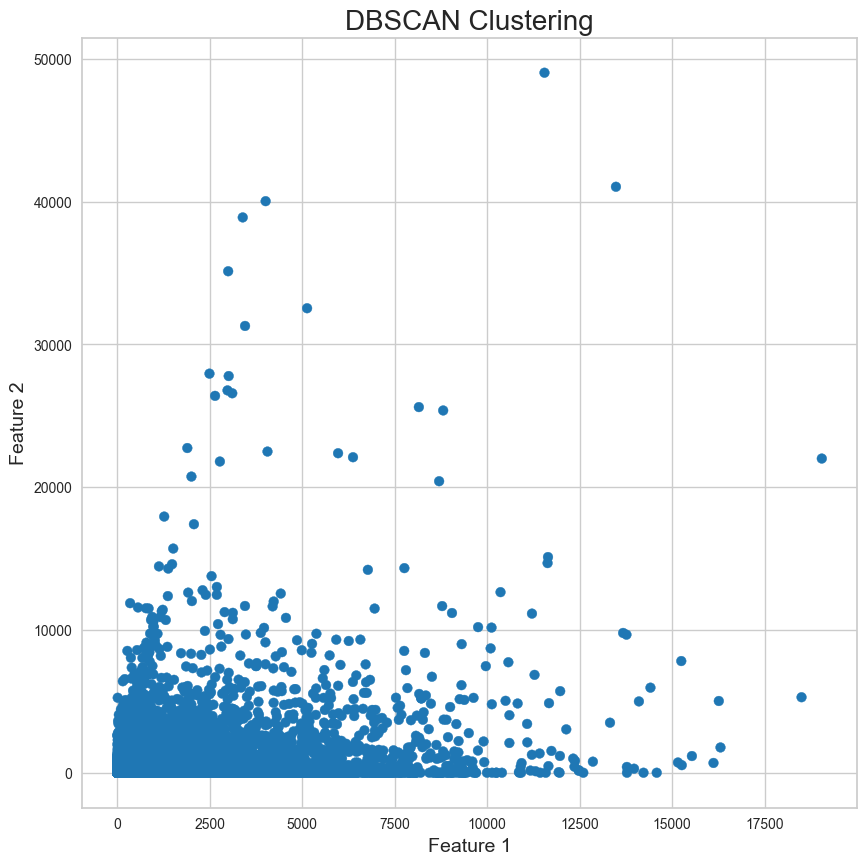

In [48]:
plt.figure(figsize=(10,10))
plt.scatter(dbscan_df['BALANCE'], dbscan_df['PURCHASES'], c=dbscan_df['CLUSTERS'], cmap='tab10')
plt.title('DBSCAN Clustering',fontsize=20)
plt.xlabel('Feature 1',fontsize=14)
plt.ylabel('Feature 2',fontsize=14)
plt.show()

## Evaluasi dan Kesimpulan

Silhouette Coefficient merupakan metrik evaluasi yang digunakan untuk mengukur kualitas pengelompokan pada algoritma K-means. Metrik ini memadukan pengukuran kedekatan antara titik data dengan cluster tempatnya berada (cohesion) dan jarak antara titik data dengan cluster lain yang berdekatan (separation).

Rentang nilai Silhouette Coefficient berkisar antara -1 hingga 1, dimana nilai yang lebih tinggi menandakan kualitas pengelompokan yang lebih baik:

- Nilai mendekati 1 mengindikasikan bahwa titik data secara efektif ditempatkan dalam clusternya, dan terdapat jarak yang cukup jauh antara cluster.
- Nilai mendekati 0 menunjukkan adanya tumpang tindih antar cluster, atau titik data berada dekat dengan batas antara dua cluster yang berdekatan.
- Nilai mendekati -1 mengindikasikan bahwa titik data mungkin akan ditempatkan lebih baik dalam cluster lain daripada cluster tempatnya saat ini.


Semakin tinggi nilai Silhouette Coefficient, semakin baik kualitas pengelompokan yang dihasilkan oleh K-means. Meskipun demikian, perlu dicatat bahwa Silhouette Coefficient hanya memberikan evaluasi internal dan tidak mempertimbangkan informasi eksternal seperti label kelas sebenarnya. Oleh karena itu, penting untuk menggunakan metrik ini bersama dengan evaluasi lain dan pertimbangan domain untuk menentukan jumlah cluster (k) yang optimal dalam algoritma K-means.

In [45]:
kmeans_silhouette = silhouette_score(df, y_pred)
hierarchical_silhouette = silhouette_score(df, y_pred2)
dbscan_silhouette = silhouette_score(df, y_dbscan_pred)

print("Silhouette Score:")
print("K-means Silhouette Score:", kmeans_silhouette)
print("Hierarchical Silhouette Score:", hierarchical_silhouette)
print("DBScan Silhouette Score:", dbscan_silhouette)

Silhouette Score:
K-means Silhouette Score: 0.256780458784255
Hierarchical Silhouette Score: 0.045256122770870995
DBScan Silhouette Score: -0.43602645936782064


Hasil silhoutte score tertinggi diperoleh K-means Silhouette Score yaitu sebesar 0.256780458784255 yang menunjukkan bahwa titik data terletak dengan baik dalam clusternya, dan jarak antara cluster lainnya cukup jauh.